# Explore here

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv,find_dotenv

# load the .env file variables
load_dotenv(".env", override=True)


CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")



In [ ]:
#http://127.0.0.1:8000/callback

In [74]:
auth_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [75]:
conociendo_rusia_uri = '79R7PUc6T6j09G8mJzNml2'

In [76]:
results = spotify.artist_top_tracks(conociendo_rusia_uri)

In [77]:
def infoartista():
    for track in results['tracks'][:10]:
        print('cancion: ' +track['name'])
        print('popularidad: ' +str(track['popularity']))
        print('duracion: ' +(str(round(track['duration_ms']/60000,1)) + ' minutos'))
        print('--------------------------------------------------------')

infoartista()
    

cancion: Esto Es Amor
popularidad: 64
duracion: 4.6 minutos
--------------------------------------------------------
cancion: Quiero Que Me Llames
popularidad: 59
duracion: 4.3 minutos
--------------------------------------------------------
cancion: Magia Blanca
popularidad: 52
duracion: 3.7 minutos
--------------------------------------------------------
cancion: Loco en el Desierto
popularidad: 58
duracion: 4.3 minutos
--------------------------------------------------------
cancion: Puede Ser
popularidad: 57
duracion: 3.8 minutos
--------------------------------------------------------
cancion: Desastres Fabulosos
popularidad: 56
duracion: 2.7 minutos
--------------------------------------------------------
cancion: A la Vez
popularidad: 56
duracion: 3.0 minutos
--------------------------------------------------------
cancion: Cabildo y Juramento
popularidad: 56
duracion: 3.4 minutos
--------------------------------------------------------
cancion: Triste
popularidad: 54
duracion: 

In [78]:
def x():
    data = []
    for track in results['tracks'][:10]:
        data.append({'cancion ': track['name'],'popularidad: ': str(track['popularity']), 'duracion: ': (str(round(track['duration_ms']/60000,1))) })
    return data 

x()





[{'cancion ': 'Esto Es Amor', 'popularidad: ': '64', 'duracion: ': '4.6'},
 {'cancion ': 'Quiero Que Me Llames',
  'popularidad: ': '59',
  'duracion: ': '4.3'},
 {'cancion ': 'Magia Blanca', 'popularidad: ': '52', 'duracion: ': '3.7'},
 {'cancion ': 'Loco en el Desierto',
  'popularidad: ': '58',
  'duracion: ': '4.3'},
 {'cancion ': 'Puede Ser', 'popularidad: ': '57', 'duracion: ': '3.8'},
 {'cancion ': 'Desastres Fabulosos',
  'popularidad: ': '56',
  'duracion: ': '2.7'},
 {'cancion ': 'A la Vez', 'popularidad: ': '56', 'duracion: ': '3.0'},
 {'cancion ': 'Cabildo y Juramento',
  'popularidad: ': '56',
  'duracion: ': '3.4'},
 {'cancion ': 'Triste', 'popularidad: ': '54', 'duracion: ': '3.1'},
 {'cancion ': 'Cinco Horas Menos', 'popularidad: ': '54', 'duracion: ': '3.4'}]

In [79]:
#transformar a dataframe 
df = pd.DataFrame.from_dict(x())

#df ordenado por popularidad creciente 

ascend_pop = df.sort_values(by='popularidad: ',ascending= False)

ascend_pop


,cancion,popularidad:,duracion:
0,Esto Es Amor,64,4.6
1,Quiero Que Me Llames,59,4.3
3,Loco en el Desierto,58,4.3
4,Puede Ser,57,3.8
5,Desastres Fabulosos,56,2.7
6,A la Vez,56,3.0
7,Cabildo y Juramento,56,3.4
8,Triste,54,3.1
9,Cinco Horas Menos,54,3.4
2,Magia Blanca,52,3.7


In [80]:
#top 3 resultante despues del sort por  popularidad 

top3 = df.head(3)

top3

,cancion,popularidad:,duracion:
0,Esto Es Amor,64,4.6
1,Quiero Que Me Llames,59,4.3
2,Magia Blanca,52,3.7


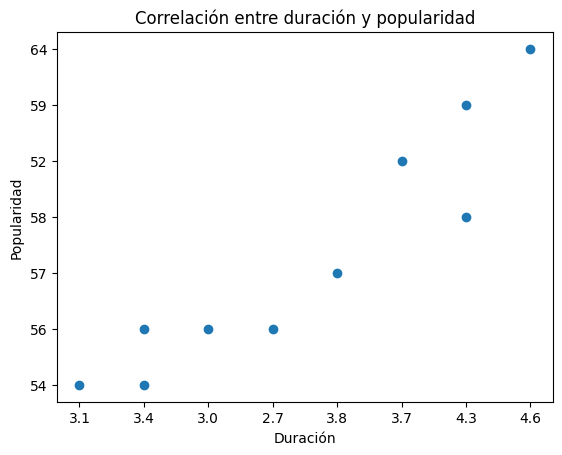

In [84]:
#scatter graph correlacion entre duracion y popularidad 
x = df['duracion: ']
y = df['popularidad: ']

plt.scatter(x,y)
plt.title('Correlación entre duración y popularidad')
plt.xlabel('Duración')
plt.ylabel('Popularidad')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

In [ ]:
#la correlacion entre el tiempo de duracion y la popularidad es positiva. Es decir, mientras mas dura la cancion, mas popular es. Sin embargo, hay tramos en los que la relacion es constante.